In [109]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merged = pd.merge(city_data, ride_data, on="city")

# Display the data table for preview
merged.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [110]:
#Create a separate dataframe for each of the types
only_urban = merged.loc[merged["type"] == "Urban"]
only_suburban = merged.loc[merged["type"] == "Suburban"]
only_rural = merged.loc[merged["type"] == "Rural"]
only_urban.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [111]:
#group by city for each data frame
urban_city_group = only_urban.groupby(["city"])
suburban_city_group = only_suburban.groupby(["city"])
rural_city_group = only_rural.groupby(["city"])

In [112]:
# create series to hold the values for x and y for each of the different axes
urban_x = urban_city_group.city.count()
urban_y = round(urban_city_group.fare.mean(),2)
urban_z = urban_city_group.driver_count.mean()

suburban_x = suburban_city_group.city.count()
suburban_y = round(suburban_city_group.fare.mean(),2)
suburban_z = suburban_city_group.driver_count.mean()

rural_x = rural_city_group.city.count()
rural_y = round(rural_city_group.fare.mean(),2)
rural_z = rural_city_group.driver_count.mean()

## Bubble Plot of Ride Sharing Data

In [113]:
# Create a legend
# Incorporate a text label regarding circle size
# Save Figure

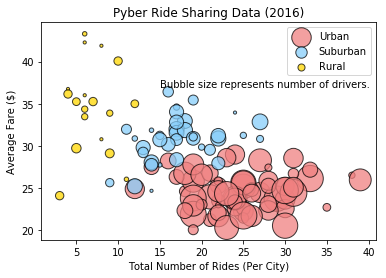

In [143]:
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
labels = ["Urban","Suburban","Rural"]
                                                                     
URB = plt.scatter(x=urban_x, y=urban_y, s=urban_z*10, color="lightcoral", alpha=0.75, linewidth=1, edgecolors="black")
SUB = plt.scatter(x=suburban_x, y=suburban_y, s=suburban_z*10, color="lightskyblue", alpha=0.75, linewidth =1, edgecolors="black")
RUR = plt.scatter(x=rural_x, y=rural_y, s=rural_z*10, color="gold", alpha=0.75, linewidth=1, edgecolors="black")
plt.legend([URB,SUB,RUR], labels)
plt.text(15,37,"Bubble size represents number of drivers.")
# Save Figure
plt.savefig("Pyber Ride Sharing Data 2016")

## Total Fares by City Type

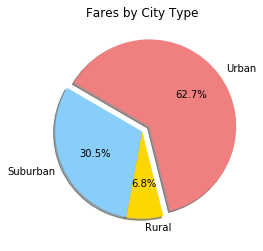

In [135]:
#variables for total fares by city type
urbanfare = only_urban.fare.sum()
suburbanfare = only_suburban.fare.sum()
ruralfare = only_rural.fare.sum()
# Build Pie Chart
totalfares = [urbanfare, suburbanfare, ruralfare]
colors = ["lightcoral", "lightskyblue", "gold"]
plt.title("Fares by City Type")
explode = (0.1, 0, 0,)
plt.pie(totalfares, labels=labels, explode=explode, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=-76)
# Save Figure
plt.savefig("faresbycitytype.png")

## Total Rides by City Type

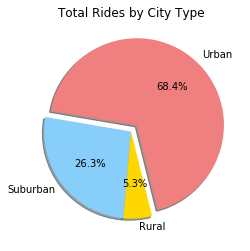

In [116]:
# Calculate Ride Percents
urban_rides = only_urban.ride_id.count()
suburban_rides = only_suburban.ride_id.count()
rural_rides = only_rural.ride_id.count()
rides_breakdown = [urban_rides, suburban_rides, rural_rides]
# Build Pie Chart
plt.title("Total Rides by City Type")
plt.pie(rides_breakdown, labels=labels, explode=explode, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=-76)
# Save Figure
plt.savefig("ridesbycitytype.png")

## Total Drivers by City Type

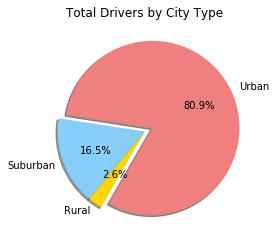

In [117]:
# Calculate Driver Percents
#Data frames 
only_urban_ = city_data.loc[city_data["type"] == "Urban"].driver_count.sum()
only_suburban_ = city_data.loc[city_data["type"] == "Suburban"].driver_count.sum()
only_rural_ = city_data.loc[city_data["type"] == "Rural"].driver_count.sum()
drivers_breakdown = [only_urban_, only_suburban_, only_rural_]
# Build Pie Chart
plt.title("Total Drivers by City Type")
plt.pie(drivers_breakdown, labels=labels, explode=explode, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=-120)
# Save Figure
plt.savefig("driversbycitytype.png")